In [1]:
# load the shampoo sales dataset
from matplotlib import pyplot
import pandas as pd
from pandas import read_csv

In [2]:
series = read_csv('temperature.csv', header=0, index_col=0, parse_dates=True,squeeze=True) 

In [3]:
def cleaning_df(df, location):
    city_series = series[location]
    city_series = city_series.reset_index()
    city_series.rename({location: 'Temp'}, axis=1, inplace=True) 

    city_series['date'] = pd.to_datetime(city_series['datetime']).dt.date
    city_series['time'] = pd.to_datetime(city_series['datetime']).dt.time
    city_series['time'] = city_series['time'].astype(str)
    
    city_series_fltr = city_series[city_series['time']=="13:00:00"]
    city_series_fltr = city_series_fltr[~city_series_fltr['Temp'].isna()]
    city_series_fltr['Converter'] = -273.15
    city_series_fltr['temp_c'] = city_series_fltr['Temp']+city_series_fltr['Converter']
    city_series_fltr = city_series_fltr.drop(['time','date','Temp', 'Converter'], axis = 1)
    
    return city_series_fltr

In [4]:
vancouver_df = cleaning_df(series, 'Vancouver')

In [5]:
van_df = vancouver_df.set_index('datetime')

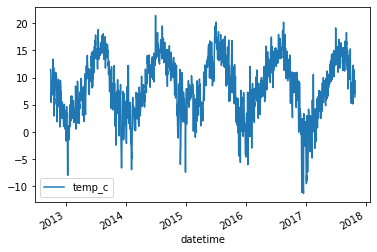

In [6]:
van_df.plot()
pyplot.show()

In [7]:
X = van_df.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [8]:
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt

In [9]:
history = [x for x in train]
predictions = list()

In [10]:
for i in range(len(test)):
    # predict
    yhat = history[-1]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))

>Predicted=4.236, Expected=2.429
>Predicted=2.429, Expected=2.005
>Predicted=2.005, Expected=4.932
>Predicted=4.932, Expected=5.115
>Predicted=5.115, Expected=6.517
>Predicted=6.517, Expected=7.451
>Predicted=7.451, Expected=10.996
>Predicted=10.996, Expected=7.385
>Predicted=7.385, Expected=8.399
>Predicted=8.399, Expected=5.802
>Predicted=5.802, Expected=6.822
>Predicted=6.822, Expected=8.685
>Predicted=8.685, Expected=9.530
>Predicted=9.530, Expected=12.314
>Predicted=12.314, Expected=9.096
>Predicted=9.096, Expected=9.297
>Predicted=9.297, Expected=10.359
>Predicted=10.359, Expected=9.298
>Predicted=9.298, Expected=9.760
>Predicted=9.760, Expected=10.901
>Predicted=10.901, Expected=8.524
>Predicted=8.524, Expected=9.688
>Predicted=9.688, Expected=10.700
>Predicted=10.700, Expected=11.924
>Predicted=11.924, Expected=13.044
>Predicted=13.044, Expected=13.050
>Predicted=13.050, Expected=12.996
>Predicted=12.996, Expected=13.197
>Predicted=13.197, Expected=12.924
>Predicted=12.924, Exp

In [11]:
# report performance
rmse = sqrt(mean_squared_error(test, predictions)) 
print('RMSE: %.3f' % rmse)

RMSE: 2.467


In [12]:
print(vancouver_df.describe())

            temp_c
count  1853.000000
mean      8.281872
std       5.439836
min     -11.340000
25%       4.590000
50%       8.510000
75%      12.680000
max      21.430000


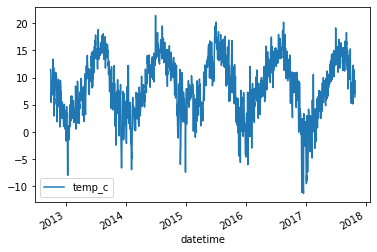

In [13]:
van_df = vancouver_df.set_index('datetime')
van_df.plot()
pyplot.show()

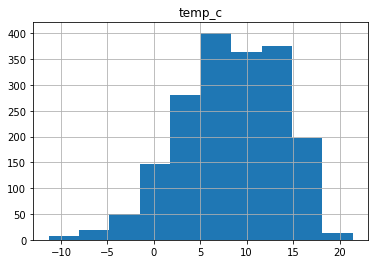

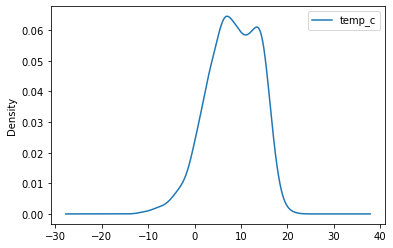

In [14]:
from matplotlib import pyplot
van_df.hist()
van_df.plot(kind='kde')
pyplot.show()

In [15]:
from pandas import Grouper
from matplotlib import pyplot
series = vancouver_df
print(series)

                 datetime     temp_c
1     2012-10-01 13:00:00  11.480000
25    2012-10-02 13:00:00  11.432043
49    2012-10-03 13:00:00  10.200000
73    2012-10-04 13:00:00   7.760000
97    2012-10-05 13:00:00   5.420000
...                   ...        ...
44353 2017-10-23 13:00:00   8.980000
44377 2017-10-24 13:00:00   6.990000
44401 2017-10-25 13:00:00   8.900000
44425 2017-10-26 13:00:00   9.480000
44449 2017-10-27 13:00:00   6.420000

[1853 rows x 2 columns]


In [16]:
vancouver_df['year'] = pd.to_datetime(vancouver_df['datetime']).dt.year
series = vancouver_df

<AxesSubplot:title={'center':'temp_c'}, xlabel='[year]'>

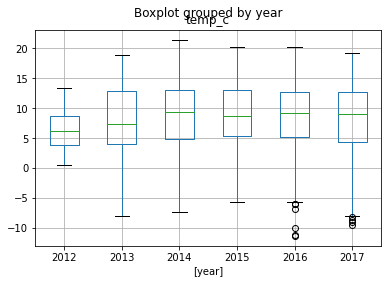

In [17]:
series.boxplot(by='year')

In [18]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value) 
    return Series(diff)


In [19]:
y = vancouver_df.drop('year', axis = 1)

In [20]:
from pandas import Series

In [21]:
def difference(dataset):
    diff = list()
    for i in range(1, len(dataset)):
        value = dataset[i] - dataset[i-1]
        diff.append(value) 
    return Series(diff)

In [22]:
stationary = difference(X)

In [23]:
stationary

0       [-0.047956467]
1         [-1.2320433]
2         [-2.4399996]
3         [-2.3400002]
4          [1.6100001]
             ...      
1847      [-2.3100004]
1848      [-1.9899998]
1849       [1.9099998]
1850       [0.5799999]
1851      [-3.0599995]
Length: 1852, dtype: object

In [24]:
y = vancouver_df.drop('year', axis = 1)

In [25]:
y

,datetime,temp_c
1,2012-10-01 13:00:00,11.480000
25,2012-10-02 13:00:00,11.432043
49,2012-10-03 13:00:00,10.200000
73,2012-10-04 13:00:00,7.760000
97,2012-10-05 13:00:00,5.420000
...,...,...
44353,2017-10-23 13:00:00,8.980000
44377,2017-10-24 13:00:00,6.990000
44401,2017-10-25 13:00:00,8.900000
44425,2017-10-26 13:00:00,9.480000


In [26]:
z = y['temp_c']

In [27]:
z = z.values
z = z.astype('float32')

In [28]:
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value) 
    return Series(diff)

In [29]:
months_in_year = 12
stationary = difference(z, months_in_year) 
stationary.index = series.index[months_in_year:]

In [30]:
from statsmodels.tsa.stattools import adfuller

In [31]:
result = adfuller(stationary)

In [32]:

print('ADF Statistic: %f' % result[0]) 
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.687323
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [33]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot


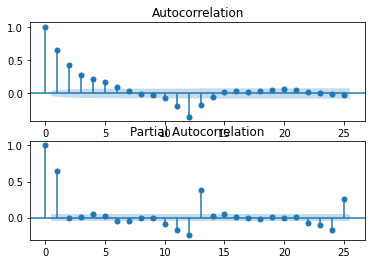

In [34]:
series = stationary
pyplot.figure()
pyplot.subplot(211)
plot_acf(series, lags=25, ax=pyplot.gca()) 
pyplot.subplot(212)
plot_pacf(series, lags=25, ax=pyplot.gca()) 
pyplot.show()

In [41]:
from sklearn.metrics import mean_squared_error 
from statsmodels.tsa.arima_model import ARIMA 
from math import sqrt
import warnings
warnings.filterwarnings("ignore")

In [42]:
train_size = int(len(z) * 0.50)
train, test = z[0:train_size], z[train_size:]

In [43]:
# invert differenced value
def inverse_difference(history, yhat, interval=1): 
    return yhat + history[-interval]

In [50]:
def evaluate_arima_model(X, arima_order): # prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:] 
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
#         print(t)
    # difference data
        months_in_year = 12
        diff = difference(history, months_in_year) 
        model = ARIMA(diff, order=arima_order) 
        model_fit = model.fit(trend='nc', disp=0) 
        yhat = model_fit.forecast()[0]
        yhat = inverse_difference(history, yhat, months_in_year) 
        predictions.append(yhat)
        history.append(test[t])
          # calculate out of sample error
        obs = test[i]
# TOO LONG, to reproduce on GIT
#         print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
    rmse = sqrt(mean_squared_error(test, predictions)) 
    return rmse

In [51]:
evaluate_arima_model(z, (1,1,1))

3.186670591266542

In [52]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
#     difference data
    months_in_year = 12
    diff = difference(history, months_in_year)
    # predict
    model = ARIMA(diff, order=(1,1,1))
    model_fit = model.fit(trend='nc', disp=0)
    yhat = model_fit.forecast()[0]
    yhat = inverse_difference(history, yhat, months_in_year) 
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
# TOO LONG, to reproduce on GIT
#     print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))

In [53]:
# report performance
rmse = sqrt(mean_squared_error(test, predictions)) 
print('RMSE: %.3f' % rmse)

RMSE: 3.187


In [54]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values): 
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values: 
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order) 
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order 
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))


In [55]:
asd1 = y['temp_c']
asd = asd1.values

In [56]:
p_values = range(0, 4)
d_values = range(0, 3)
q_values = range(0, 4)
warnings.filterwarnings("ignore") 
evaluate_models(z, p_values, d_values, q_values)


(0, 0, 0)
yes
(0, 0, 0)
(0, 0, 1)
yes
(0, 0, 1)
ARIMA(0, 0, 1) RMSE=3.379
(0, 0, 2)
yes
(0, 0, 2)
ARIMA(0, 0, 2) RMSE=3.237
(0, 0, 3)
yes
(0, 0, 3)
ARIMA(0, 0, 3) RMSE=3.220
(0, 1, 0)
yes
(0, 1, 0)
(0, 1, 1)
yes
(0, 1, 1)
ARIMA(0, 1, 1) RMSE=3.440
(0, 1, 2)
yes
(0, 1, 2)
ARIMA(0, 1, 2) RMSE=3.328
(0, 1, 3)
yes
(0, 1, 3)
ARIMA(0, 1, 3) RMSE=3.260
(0, 2, 0)
yes
(0, 2, 0)
(0, 2, 1)
yes
(0, 2, 1)
ARIMA(0, 2, 1) RMSE=3.537
(0, 2, 2)
yes
(0, 2, 2)
(0, 2, 3)
yes
(0, 2, 3)
ARIMA(0, 2, 3) RMSE=3.330
(1, 0, 0)
yes
(1, 0, 0)
ARIMA(1, 0, 0) RMSE=3.185
(1, 0, 1)
yes
(1, 0, 1)
ARIMA(1, 0, 1) RMSE=3.187
(1, 0, 2)
yes
(1, 0, 2)
ARIMA(1, 0, 2) RMSE=3.193
(1, 0, 3)
yes
(1, 0, 3)
ARIMA(1, 0, 3) RMSE=3.188
(1, 1, 0)
yes
(1, 1, 0)
ARIMA(1, 1, 0) RMSE=3.479
(1, 1, 1)
yes
(1, 1, 1)
ARIMA(1, 1, 1) RMSE=3.187
(1, 1, 2)
yes
(1, 1, 2)
ARIMA(1, 1, 2) RMSE=3.189
(1, 1, 3)
yes
(1, 1, 3)
ARIMA(1, 1, 3) RMSE=3.194
(1, 2, 0)
yes
(1, 2, 0)
ARIMA(1, 2, 0) RMSE=4.677
(1, 2, 1)
yes
(1, 2, 1)
ARIMA(1, 2, 1) RMSE=3.480
(1, 

In [57]:
import numpy as np

In [58]:
history = [x for x in train]

In [59]:
print(diff)

0      -2.009999
1       0.317957
2       3.190001
3       2.639999
4       5.040000
          ...   
1835    3.600000
1836    0.950000
1837   -0.720000
1838    1.930000
1839    4.340000
Length: 1840, dtype: float64


In [60]:
# difference data
months_in_year = 12
diff = difference(history, months_in_year)
# fit model
model = ARIMA(diff, order=(3,1,3))
model_fit = model.fit(trend='nc', disp=0)
# bias constant, could be calculated from in-sample mean residual bias = 165.904728
# save model
model_fit.save('model.pkl')
# np.save('model_bias.npy', [bias])

In [61]:
from statsmodels.tsa.arima_model import ARIMAResults

In [62]:
model_fit = ARIMAResults.load('model.pkl')
yhat = float(model_fit.forecast()[0])
yhat = inverse_difference(series.values, yhat, months_in_year) 
print('Predicted: %.3f' % yhat)


Predicted: 4.962


In [63]:
train, test = X[0:train_size], X[train_size:]

In [64]:
# load and evaluate the finalized model on the validation dataset
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from sklearn.metrics import mean_squared_error 
from math import sqrt
# # create a differenced series
# def difference(dataset, interval=1):
#     diff = list()
#     for i in range(interval, len(dataset)):
# value = dataset[i] - dataset[i - interval]
# diff.append(value) return diff
# # invert differenced value
# def inverse_difference(history, yhat, interval=1): return yhat + history[-interval]
# load and prepare datasets
# dataset = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True) 
# X = dataset.values.astype('float32')
# history = [x for x in X]
# months_in_year = 12
# validation = read_csv('validation.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# y = validation.values.astype('float32')
# load model
model_fit = ARIMAResults.load('model.pkl')
# make first prediction
predictions = list()
yhat = float(model_fit.forecast()[0])
yhat = inverse_difference(history, yhat, months_in_year) 
predictions.append(yhat)
history.append(test[0])
print('>Predicted=%.3f, Expected=%.3f' % (yhat, test[0]))


>Predicted=5.864, Expected=2.429


In [76]:
diff = diff.astype(float)

In [77]:
model = ARIMA(diff, order=(3,1,3))

In [78]:
# rolling forecasts
for i in range(1, len(y)):
  # difference data
    months_in_year = 12
    diff = difference(history, months_in_year)
    diff = diff.astype(float)
    # predict
    model = ARIMA(diff, order=(3,1,3))
    model_fit = model.fit(trend='nc', disp=0)
    yhat = model_fit.forecast()[0]
    yhat = inverse_difference(history, yhat, months_in_year) 
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions)) 
print('RMSE: %.3f' % rmse)
pyplot.plot(test)
pyplot.plot(predictions, color='red') 
pyplot.show()

>Predicted=1.460, Expected=2.005
>Predicted=-0.011, Expected=4.932
>Predicted=5.530, Expected=5.115
>Predicted=4.031, Expected=6.517
>Predicted=5.277, Expected=7.451
>Predicted=7.769, Expected=10.996
>Predicted=10.319, Expected=7.385
>Predicted=5.722, Expected=8.399
>Predicted=6.037, Expected=5.802
>Predicted=6.464, Expected=6.822
>Predicted=5.205, Expected=8.685
>Predicted=5.805, Expected=9.530
>Predicted=7.874, Expected=12.314
>Predicted=11.492, Expected=9.096
>Predicted=7.985, Expected=9.297
>Predicted=9.351, Expected=10.359
>Predicted=10.282, Expected=9.298
>Predicted=12.131, Expected=9.760
>Predicted=6.158, Expected=10.901
>Predicted=11.167, Expected=8.524
>Predicted=6.451, Expected=9.688
>Predicted=8.392, Expected=10.700
>Predicted=12.501, Expected=11.924
>Predicted=11.827, Expected=13.044
>Predicted=13.602, Expected=13.050
>Predicted=10.693, Expected=12.996
>Predicted=11.904, Expected=13.197
>Predicted=12.592, Expected=12.924
>Predicted=11.702, Expected=11.915
>Predicted=11.349,

>Predicted=1.537, Expected=1.170
>Predicted=-2.390, Expected=0.025
>Predicted=5.325, Expected=2.960
>Predicted=4.025, Expected=3.601
>Predicted=8.679, Expected=0.800
>Predicted=-1.540, Expected=0.050
>Predicted=3.443, Expected=-0.810
>Predicted=0.680, Expected=0.370
>Predicted=1.819, Expected=2.440
>Predicted=3.373, Expected=7.230
>Predicted=8.221, Expected=3.867
>Predicted=0.949, Expected=1.840
>Predicted=-0.418, Expected=1.780
>Predicted=1.718, Expected=2.540
>Predicted=4.499, Expected=0.740
>Predicted=0.953, Expected=0.120
>Predicted=-1.080, Expected=1.590
>Predicted=1.150, Expected=1.370
>Predicted=-0.431, Expected=1.030
>Predicted=1.670, Expected=-3.540
>Predicted=-0.050, Expected=-4.160
>Predicted=1.407, Expected=-4.060
>Predicted=-3.641, Expected=-4.630
>Predicted=-3.744, Expected=-4.363
>Predicted=-2.774, Expected=-1.240
>Predicted=0.750, Expected=-0.010
>Predicted=-0.732, Expected=2.250
>Predicted=0.739, Expected=3.439
>Predicted=4.588, Expected=1.915
>Predicted=1.338, Expecte

>Predicted=16.521, Expected=14.740
>Predicted=15.928, Expected=15.570
>Predicted=15.156, Expected=15.150
>Predicted=14.621, Expected=17.000
>Predicted=14.985, Expected=18.660
>Predicted=18.114, Expected=17.390
>Predicted=16.274, Expected=16.370
>Predicted=15.350, Expected=16.350
>Predicted=16.682, Expected=16.120
>Predicted=14.363, Expected=17.830
>Predicted=16.415, Expected=20.180
>Predicted=18.679, Expected=16.820
>Predicted=16.446, Expected=16.680
>Predicted=15.957, Expected=13.710
>Predicted=14.830, Expected=11.300
>Predicted=13.891, Expected=14.400
>Predicted=16.481, Expected=16.160
>Predicted=17.016, Expected=17.320
>Predicted=15.723, Expected=17.920
>Predicted=17.183, Expected=15.430
>Predicted=16.459, Expected=13.540
>Predicted=15.015, Expected=14.550
>Predicted=17.988, Expected=15.410
>Predicted=14.701, Expected=13.710
>Predicted=13.573, Expected=12.640
>Predicted=11.301, Expected=12.230
>Predicted=11.172, Expected=9.810
>Predicted=12.706, Expected=12.160
>Predicted=14.552, Ex

>Predicted=8.106, Expected=7.190
>Predicted=7.736, Expected=5.190
>Predicted=3.990, Expected=6.000
>Predicted=4.883, Expected=3.810
>Predicted=3.760, Expected=9.010
>Predicted=9.047, Expected=6.324
>Predicted=3.728, Expected=7.980
>Predicted=5.702, Expected=7.180
>Predicted=7.520, Expected=5.370
>Predicted=5.618, Expected=8.050
>Predicted=8.708, Expected=9.990
>Predicted=10.037, Expected=8.340
>Predicted=7.600, Expected=8.000
>Predicted=4.745, Expected=8.420
>Predicted=9.435, Expected=9.020
>Predicted=5.814, Expected=8.420
>Predicted=10.827, Expected=7.980
>Predicted=6.785, Expected=9.390
>Predicted=9.549, Expected=7.230
>Predicted=6.357, Expected=6.810
>Predicted=5.401, Expected=6.020
>Predicted=8.637, Expected=5.400
>Predicted=7.757, Expected=5.280
>Predicted=4.963, Expected=5.130
>Predicted=6.388, Expected=4.830
>Predicted=6.256, Expected=9.780
>Predicted=9.711, Expected=5.780
>Predicted=6.913, Expected=9.560
>Predicted=7.889, Expected=7.190
>Predicted=9.560, Expected=8.170
>Predict

IndexError: index 927 is out of bounds for axis 0 with size 927

In [79]:
from matplotlib.pyplot import figure

figure(figsize=(15, 6), dpi=80)

<Figure size 1200x480 with 0 Axes>

<Figure size 1200x480 with 0 Axes>

In [80]:
pyplot.rcParams["figure.figsize"] = [16,9]

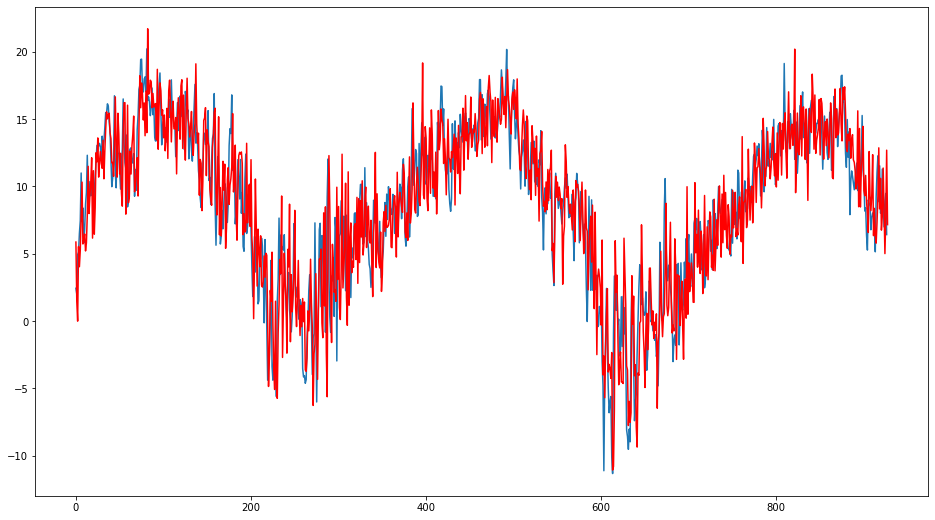

In [81]:
pyplot.plot(test)
pyplot.plot(predictions, color='red') 
pyplot.show()